<a href="https://colab.research.google.com/github/AitorNoel/PontiaProyectoJupiter/blob/main/EDA3dataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nbformat
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [72]:
#Cargar los datos:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/EDAdfs_(3).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#estructura del DataFrame:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha de publicacion  6175 non-null   object 
 1   titulo                6175 non-null   object 
 2   descripcion           6175 non-null   object 
 3   nombre_empresa        6175 non-null   object 
 4   ciudad                6174 non-null   object 
 5   cod_pais              6175 non-null   object 
 6   jornada               4647 non-null   object 
 7   tipo de trabajo       4053 non-null   object 
 8   cluster               6175 non-null   object 
 9   tipo de contrato      4647 non-null   object 
 10  salario_minimo        1687 non-null   float64
 11  salario_maximo        1563 non-null   float64
 12  periodo salarial      3163 non-null   object 
 13  moneda                3163 non-null   object 
 14  hour                  3163 non-null   object 
dtypes: float64(2), object

In [76]:
#limpieza de datos:
print(df.isnull().sum()) #verificamos valores nulos


fecha de publicacion    0
titulo                  0
descripcion             0
nombre_empresa          0
ciudad                  0
cod_pais                0
jornada                 0
tipo de trabajo         0
cluster                 0
tipo de contrato        0
salario_minimo          0
salario_maximo          0
periodo salarial        0
moneda                  0
hour                    0
dtype: int64


# VISUALIZACIONES

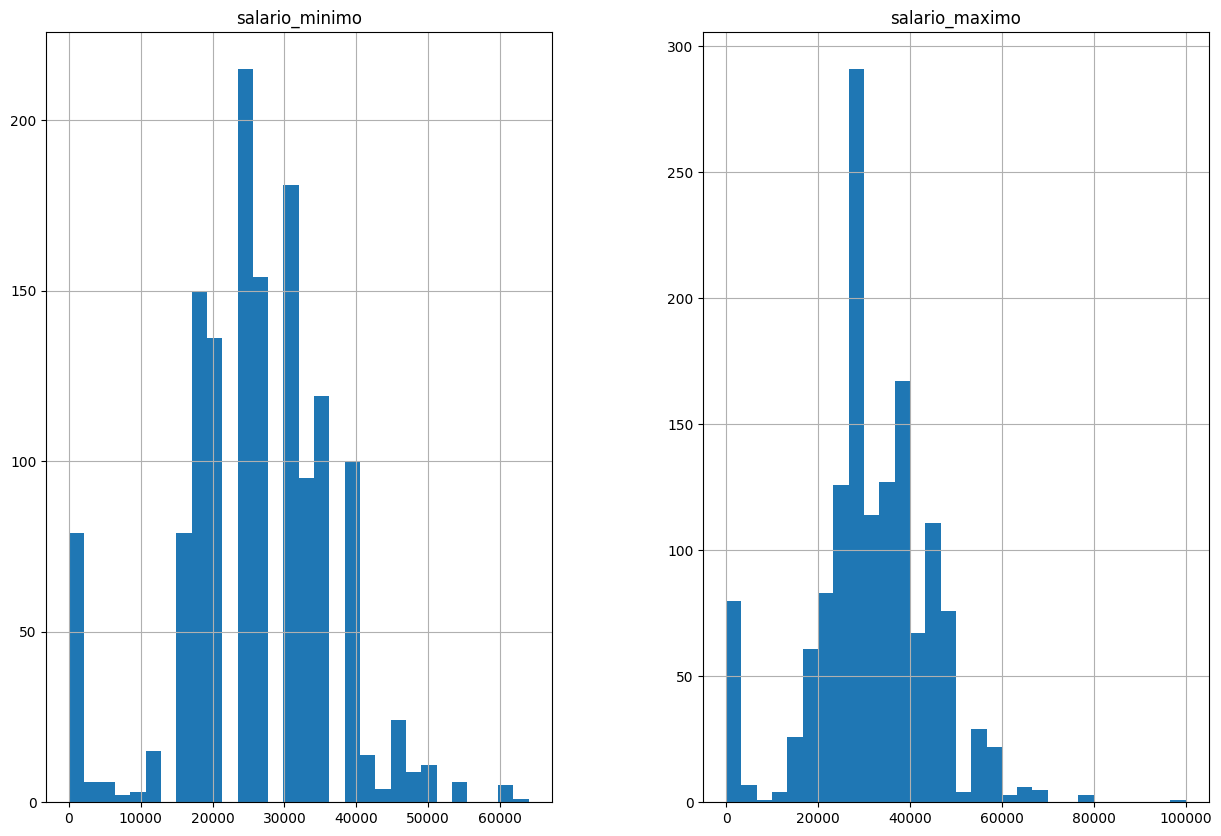

In [78]:
#visualizamos datos:
df.hist(bins=30, figsize=(15,10))
plt.show()

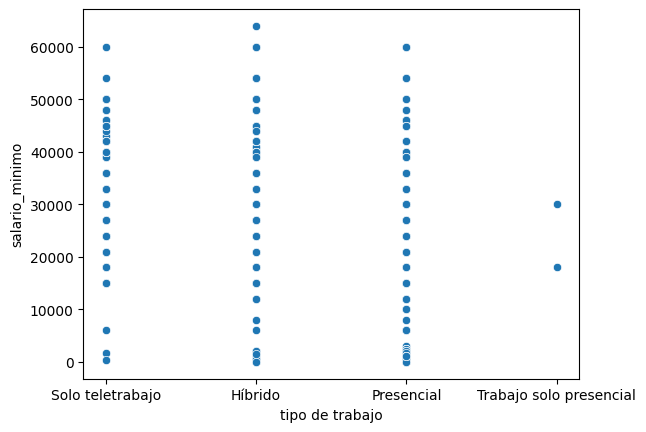

In [79]:
sns.scatterplot(data=df,x='tipo de trabajo',y='salario_minimo')
plt.show()

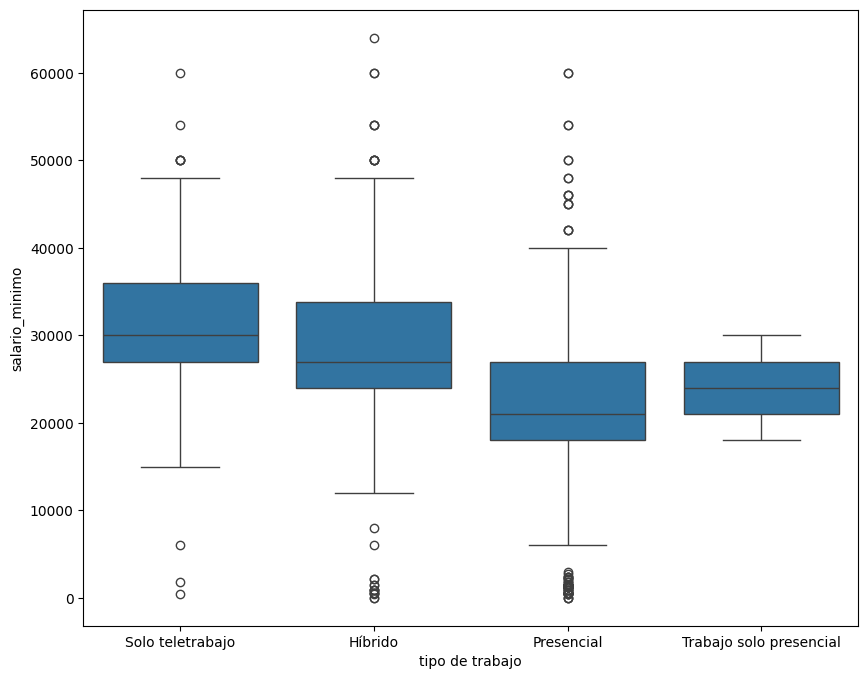

In [82]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='tipo de trabajo',y='salario_minimo')
plt.show()

tipo de trabajo
Presencial                 640
Híbrido                    456
Solo teletrabajo           316
Trabajo solo presencial      2
Name: count, dtype: int64


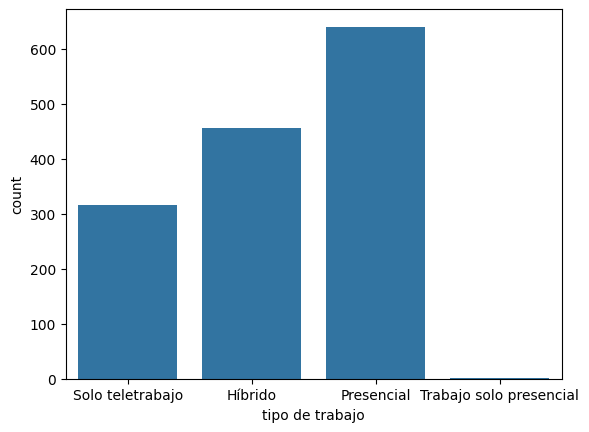

In [83]:
print(df['tipo de trabajo'].value_counts())
sns.countplot(data=df,x='tipo de trabajo')
plt.show()

In [77]:
df.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,es,Jornada completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR,EUR,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR,EUR,YEAR


In [5]:
df.shape

(6175, 15)

In [6]:
# Get the unique values for all columns
unique_values = df.apply(pd.Series.unique)
print(unique_values)

fecha de publicacion    [2022-07-12, 2022-07-11, 2022-08-13, 2022-06-1...
titulo                  [Técnico Gestión de la Demanda, Java - SpringB...
descripcion             [-Definición de roles y escenarios\r\n      - ...
nombre_empresa          [Atento España - Estructura, AGIO GLOBAL TECHN...
ciudad                  [Madrid, Maresme Central, Getafe, Valencia, Má...
cod_pais                                                             [es]
jornada                 [Jornada completa, Jornada indiferente, Jornad...
tipo de trabajo         [Híbrido, Solo teletrabajo, Presencial, nan, T...
cluster                 [Informática y telecomunicaciones, Information...
tipo de contrato        [Contrato indefinido, Contrato otros contratos...
salario_minimo          [nan, 40000.0, 27000.0, 24000.0, 18000.0, 3000...
salario_maximo          [nan, 45000.0, 30000.0, 27000.0, 21000.0, 4000...
periodo salarial                                 [nan, YEAR, MONTH, HOUR]
moneda                                

In [84]:
# Count the number of null values in the entire DataFrame
null_count = df.isnull().sum().sum()
print(null_count)

0


In [8]:
#Value_counts
value_counts = df['titulo'].value_counts()

print(value_counts)

titulo
Soldador/a                                                              8
Electromecánico/a                                                       8
Administrador de Sistemas                                               7
IT Project Manager                                                      7
Programador .NET                                                        6
                                                                       ..
Beca Energía Solar Fotovoltaica                                         1
Ingeniero/a de Proyectos e Instalaciones MECÁNICO                       1
Personal Ingeniería: Eléctrica / Electrónica / Organización / Diseño    1
Técnico Responsable de Industria 4.0                                    1
Topógrafo para asistencia ferroviaria en Martorell                      1
Name: count, Length: 5589, dtype: int64


In [85]:
# Count the number of null values in column 'A'
null_count_titulo = df['titulo'].isnull().sum()

print("Number of null values in column 'titulo':", null_count_titulo)

Number of null values in column 'titulo': 0


In [86]:
#Value_counts
value_counts = df['periodo salarial'].value_counts()

print(value_counts)

periodo salarial
YEAR     1328
MONTH      81
HOUR        5
Name: count, dtype: int64


In [87]:
# Count the number of null values in column 'A'
null_count_periodo = df['periodo salarial'].isnull().sum()

print("Number of null values in column 'periodo salarial':", null_count_periodo)

Number of null values in column 'periodo salarial': 0


In [88]:
#Value_counts
value_counts = df[['ciudad']].value_counts()

print(value_counts)

ciudad   
Madrid       511
Barcelona    214
Valencia      43
Sevilla       43
Bilbao        25
            ... 
Mungia         1
Munich         1
Cuéllar        1
Cuenca         1
Marbella       1
Name: count, Length: 245, dtype: int64


In [13]:
dfes = df[df['cod_pais'] == 'es']
print(dfes)

     fecha de publicacion                                             titulo  \
0              2022-07-12                      Técnico Gestión de la Demanda   
1              2022-07-12  Java - SpringBoot - Proyecto estable - Teletra...   
2              2022-07-12            Consultor SAP Hana Ingles Alto (Remoto)   
3              2022-07-12        ANDROID DEVELOPER. INGLÉS ALTO. 100% REMOTO   
4              2022-07-12                        Analista Funcional TEMPORAL   
...                   ...                                                ...   
6170           2022-08-08                  Digital Project Consultant Junior   
6171           2022-03-28                                Electrical Engineer   
6172           2022-03-28                    Energy Expert Engineer (Remote)   
6173           2022-03-28  Topógrafo para asistencia ferroviaria en Marto...   
6174           2022-03-28         Técnico/a de mantenimiento electromecánico   

                                       

In [14]:
# Definir las palabras clave que deseas buscar en los títulos
palabras_clave = ['analisis', 'analysis', 'data', 'science', 'product', 'marketing','front','end','analyst','scientist']

# Crear una expresión regular para buscar las palabras clave en los títulos, ignorando mayúsculas y minúsculas
patron = '|'.join(palabras_clave)

# Aplicar la expresión regular a la columna 'title' y obtener los títulos que coinciden
titulos_coincidentes = dfes[dfes['titulo'].str.contains(patron,case=False)]['titulo']

# Obtener los valores únicos de los títulos que coinciden
valores_unicos = titulos_coincidentes.unique()

# Contar la frecuencia de cada título que coincide con las palabras clave
frecuencia_titulos = titulos_coincidentes.value_counts()

# Imprimir los valores únicos y la frecuencia de cada título que coincide con las palabras clave

df_resultado = pd.DataFrame({'Titulo': valores_unicos, 'Frecuencia': frecuencia_titulos})
df_resultado.head(10).reset_index()

,titulo,Titulo,Frecuencia
0,Product Owner,PROGRAMADOR FRONT-END,5
1,Consultor/a técnico y desarrollador de Product...,Big Data Engineer - Technical Support - Google...,4
2,Take UP - Business Analyst Junior con Francés,Ruby Backend Engineer,4
3,Agente de Telemarketing Sector Tecnológico,Desarrollador Front-end,4
4,Data Engineer,Frontend Developer Angular.,4
5,Data Scientist,TECNICO DATA CENTER - ALMERIA,4
6,Frontend Developer,Data Architect,4
7,Master Data Analyst,Big Data Engineer (AWS) - Compañía Sector Retail,3
8,(Senior) Backend Engineer,Dependiente/a Tienda Orange - Valencia - Jorna...,3
9,Big Data Engineer - Technical Support - Google...,Frontend Developer (Angular) - Full Remote,3


In [15]:
# Count the number of null values in column 'A'
null_count_ciudad= dfes['ciudad'].isnull().sum()

print("Number of null values in column 'ciudad':", null_count_ciudad)

Number of null values in column 'ciudad': 1


In [16]:
#Value_counts
value_counts = dfes[['cod_pais']].value_counts()

print(value_counts)

cod_pais
es          6175
Name: count, dtype: int64


In [17]:
# Count the number of null values in column 'A'
null_count_pais = dfes['cod_pais'].isnull().sum()

print("Number of null values in column 'cod_pais':", null_count_pais)

Number of null values in column 'cod_pais': 0


In [109]:
#Value_counts
value_counts = df[['jornada']].value_counts()

print(value_counts)

jornada                        
Jornada completa                   1315
Jornada indiferente                  37
Jornada intensiva - mañana           35
Jornada parcial - mañana             12
Jornada parcial - indiferente         5
Jornada parcial - tarde               4
Jornada intensiva - noche             3
Jornada intensiva - tarde             2
Jornada intensiva - indiferente       1
Name: count, dtype: int64


In [110]:
df['jornada'] = df['jornada'].replace({'Jornada indiferente': 'completa', 'Jornada completa': 'completa','Jornada intensiva - mañana':'completa','Jornada parcial - mañana':'parcial','Jornada parcial - indiferente':'parcial','Jornada intensiva - indiferente':'completa','Jornada parcial - tarde':'parcial','Jornada intensiva - tarde':'completa','Jornada intensiva - noche':'completa'})


In [111]:
value_counts = df[['jornada']].value_counts()

print(value_counts)

jornada 
completa    1393
parcial       21
Name: count, dtype: int64


In [112]:
# Count the number of null values in column 'A'
null_count_jornada = df['jornada'].isnull().sum()

print("Number of null values in column 'jornada':", null_count_jornada)

Number of null values in column 'jornada': 0


In [113]:
#Value_counts
value_counts = df['tipo de trabajo'].value_counts()

print(value_counts)

tipo de trabajo
Presencial                 640
Híbrido                    456
Solo teletrabajo           316
Trabajo solo presencial      2
Name: count, dtype: int64


In [114]:
df['tipo de trabajo'] = df['tipo de trabajo'].replace({'Solo teletrabajo': 'teletrabajo','Trabajo solo presencial':'Presencial'})

In [115]:
value_counts = df['tipo de trabajo'].value_counts()

print(value_counts)

tipo de trabajo
Presencial     642
Híbrido        456
teletrabajo    316
Name: count, dtype: int64


In [116]:

null_count_tipoTrabajo = df['tipo de trabajo'].isnull().sum()

print("Number of null values in column 'tipo de trabajo':", null_count_tipoTrabajo)

Number of null values in column 'tipo de trabajo': 0


In [117]:
#Value_counts
value_counts = df[['nombre_empresa']].value_counts()

print(value_counts)

nombre_empresa                
BETWEEN Technology                65
ISPROX                            38
ADECCO                            34
PSS                               32
Rawson BPO                        31
                                  ..
Grupo Empresarial Enhol            1
Grupo Diusframi                    1
Grupo Danone-Puestos de Stages     1
Grupo Arzábal                      1
vivantadental                      1
Name: count, Length: 510, dtype: int64


In [118]:
# Count the number of null values in column 'A'
null_count_empresa = df['nombre_empresa'].isnull().sum()

print("Number of null values in column 'nombre_empresa':", null_count_empresa)

Number of null values in column 'nombre_empresa': 0


##CASE STUDY QUESTIONS



In [119]:
#HEAD
df.head(5)

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,es,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR,EUR,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR,EUR,YEAR


In [29]:
#tail
df.tail(5)

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
6170,2022-08-08,Digital Project Consultant Junior,High-level knowledge and culture in new digita...,Atos,Madrid,es,NaN,NaN,Information Technology,NaN,NaN,NaN,YEAR,EUR,YEAR
6171,2022-03-28,Electrical Engineer,FERCHAU Spain es la filial independiente del l...,FERCHAU SPAIN,Parets del Vallès,es,Jornada completa,Trabajo solo presencial,Ingenieros y técnicos,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
6172,2022-03-28,Energy Expert Engineer (Remote),As Senior Energy Expert in Digital Operations ...,Huxley,Barcelona,es,Jornada completa,Solo teletrabajo,Ingenieros y técnicos,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
6173,2022-03-28,Topógrafo para asistencia ferroviaria en Marto...,Buscamos una persona con la titulación de Inge...,Corporativa - INECO,Martorell,es,Jornada completa,NaN,Ingenieros y técnicos,Contrato otros contratos,NaN,NaN,NaN,NaN,NaN
6174,2022-03-28,Técnico/a de mantenimiento electromecánico,Mantenimiento preventivo y correctivo de maqui...,Robert Walters,Vilafranca del Penedès,es,Jornada completa,Trabajo solo presencial,Ingenieros y técnicos,Contrato indefinido,30000.00,36000.00,YEAR,EUR,YEAR


In [30]:
#sample
df.sample(5)

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
5076,2022-07-16,Application Management (f/m/d) for Power BI Se...,Provide consultancy for new projects and suppo...,Siemens,Barcelona,es,NaN,NaN,Information Technology,NaN,NaN,NaN,YEAR,EUR,YEAR
4993,2022-08-11,Desarrollador/a Full Stack,Buscamos candidaturas con conocimientos avanza...,"ELSAMEX GESTION DE INFRAESTRUCTURAS, SL",Madrid,es,Jornada completa,NaN,Informática y telecomunicaciones,Contrato de duración determinada,NaN,NaN,NaN,NaN,NaN
3684,2022-07-22,RPA developer,"Centrada en 6 áreas de especialización, aborda...",Devoteam Spain,Madrid,es,NaN,NaN,Information Technology,NaN,NaN,NaN,YEAR,EUR,YEAR
1685,2022-07-20,TECNICO DE DELINEACION DE PROYECTOS Y EJECUCIO...,TÉCNICO DE DESARROLLO DE PROYECTOS DE EDIFICAC...,I.G.P. INGESA,Barcelona,es,Jornada completa,Presencial,Ingenieros y técnicos,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
5927,2022-07-07,SysAdmin,Si has llegado hasta aquí es porque en algún m...,Paradigma Digital,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN


In [31]:
#types
df.dtypes

fecha de publicacion     object
titulo                   object
descripcion              object
nombre_empresa           object
ciudad                   object
cod_pais                 object
jornada                  object
tipo de trabajo          object
cluster                  object
tipo de contrato         object
salario_minimo          float64
salario_maximo          float64
periodo salarial         object
moneda                   object
hour                     object
dtype: object

In [32]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha de publicacion  6175 non-null   object 
 1   titulo                6175 non-null   object 
 2   descripcion           6175 non-null   object 
 3   nombre_empresa        6175 non-null   object 
 4   ciudad                6174 non-null   object 
 5   cod_pais              6175 non-null   object 
 6   jornada               4647 non-null   object 
 7   tipo de trabajo       4053 non-null   object 
 8   cluster               6175 non-null   object 
 9   tipo de contrato      4647 non-null   object 
 10  salario_minimo        1687 non-null   float64
 11  salario_maximo        1563 non-null   float64
 12  periodo salarial      3163 non-null   object 
 13  moneda                3163 non-null   object 
 14  hour                  3163 non-null   object 
dtypes: float64(2), object

In [120]:
#describe
df.describe()

,salario_minimo,salario_maximo
count,1414.00,1414.00
mean,25994.19,32303.08
std,10544.32,13169.36
min,12.00,12.00
25%,21000.00,24000.00
50%,27000.00,33000.00
75%,33000.00,40000.00
max,64000.00,100000.00


###Preguntas Headhunters

#1-¿Cuántas ofertas hay en el dataset?

In [90]:
#cantidad de ofertas por titulo:
cantidad_ofertas=df[['titulo']].value_counts()
print(cantidad_ofertas)

titulo                                                                          
Electromecánico/a                                                                   6
Soldador/a                                                                          5
Técnico Informático                                                                 4
Administrador de Sistemas                                                           4
Programador .NET                                                                    4
                                                                                   ..
Electromecánico/a mantenimiento SSGG                                                1
Electromecánico/a Senior - Mantenimiento Industrial                                 1
Electromecánico/a - Parets del Vallés                                               1
Electromecánico/a (carretillas)                                                     1
moderador de contenido con Italiano/content moderator nativ

In [121]:
#cantidad total de ofertas:
cantidad_total_de_ofertas=df.shape[0]
print("el numero total de ofertas es:",cantidad_total_de_ofertas)

el numero total de ofertas es: 1414


#2-¿Cuál es el salario medio?

In [122]:
#salario medio:
salario_minimo=df['salario_minimo'].mean()
print(round(salario_minimo))

25994


In [37]:
salario_maximo=df['salario_maximo'].mean()
print(round(salario_maximo))

32438


In [38]:
salario_medio=(salario_minimo+salario_maximo)/2
print("el salario medio es:",round(salario_medio),"euros")

el salario medio es: 29298 euros


#3-trabajos mejor pagados y donde:

In [40]:
#trabajo mejor pagado:
indice_max_salario=df['salario_maximo'].idxmax()
trabajo_mejor_pagado=df.loc[indice_max_salario]
print(trabajo_mejor_pagado)

fecha de publicacion                                  2022-07-07 00:00:00
titulo                                              Country Manager (ESP)
descripcion             Freedom and responsibility to set the directio...
nombre_empresa                                                  Hostinger
ciudad                                                          Barcelona
cod_pais                                                               es
jornada                                                               NaN
tipo de trabajo                                                       NaN
cluster                                            Information Technology
tipo de contrato                                                      NaN
salario_minimo                                                   70000.00
salario_maximo                                                  100000.00
periodo salarial                                                     YEAR
moneda                                

#4-tienen los mismos ofertantes ambas fuentes de datos?

#5-qué empresas publican los mejores salarios?

In [41]:
#empresas con mejores salarios:
mejores_salarios=df['salario_maximo'].mean()
print(round(mejores_salarios))


32438


In [173]:
empresas=df.groupby('nombre_empresa')
filtrado=empresas.filter(lambda x: x['salario_maximo'].sum()>29000)
principales_empresas=df['nombre_empresa'].head()
print(principales_empresas)

1          AGIO GLOBAL TECHNOLOGY
2             AIRON Sistemas S.L.
4      Atento España - Estructura
5                          Hiring
10    IRIUM SOLUCIONES Y SISTEMAS
Name: nombre_empresa, dtype: object


In [43]:
#donde se demanda mas talento:
lugar_mas_demanda=df['ciudad'].mode()[0]
lugar_mas_demanda

'Madrid'

###ESPAÑA##

*##EDA TRABAJOS EN ESPAÑA*

In [136]:
##trabajos solo en ESPAÑA:
dfes=df[df['cod_pais'] == 'es']
dfes.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,es,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR,EUR,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR,EUR,YEAR


In [137]:
#información básica:
print(dfes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 1 to 6174
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha de publicacion  1414 non-null   object 
 1   titulo                1414 non-null   object 
 2   descripcion           1414 non-null   object 
 3   nombre_empresa        1414 non-null   object 
 4   ciudad                1414 non-null   object 
 5   cod_pais              1414 non-null   object 
 6   jornada               1414 non-null   object 
 7   tipo de trabajo       1414 non-null   object 
 8   cluster               1414 non-null   object 
 9   tipo de contrato      1414 non-null   object 
 10  salario_minimo        1414 non-null   float64
 11  salario_maximo        1414 non-null   float64
 12  periodo salarial      1414 non-null   object 
 13  moneda                1414 non-null   object 
 14  hour                  1414 non-null   object 
dtypes: float64(2), object(13)


In [138]:
print(dfes.describe())

       salario_minimo  salario_maximo
count         1414.00         1414.00
mean         25994.19        32303.08
std          10544.32        13169.36
min             12.00           12.00
25%          21000.00        24000.00
50%          27000.00        33000.00
75%          33000.00        40000.00
max          64000.00       100000.00


# *1-ofertas en España:*


In [168]:
##ofertas de empleo en el data set ESPAÑA
#cantidad de ofertas por titulo:
cantidad_ofertas=dfes[['titulo']].value_counts()
print(cantidad_ofertas)

titulo                                                    
Soldador/a                                                    8
Electromecánico/a                                             8
Administrador de Sistemas                                     7
IT Project Manager                                            7
QA Tester                                                     6
                                                             ..
Entrepreneur + Consultant = Business Builder (all genders)    1
Enterprise Architect - Partial Remote - Xátiva (Valencia)     1
Enterprise Account Executive - Spain                          1
Enterprise Account Executive                                  1
全球速卖通事业部(AliExpress) Head of Transport Logistics              1
Name: count, Length: 5589, dtype: int64


In [140]:
#verificamos valores nulos:
print(df.isnull().sum())

fecha de publicacion    0
titulo                  0
descripcion             0
nombre_empresa          0
ciudad                  0
cod_pais                0
jornada                 0
tipo de trabajo         0
cluster                 0
tipo de contrato        0
salario_minimo          0
salario_maximo          0
periodo salarial        0
moneda                  0
hour                    0
dtype: int64


In [141]:
#eliminamos filas con valores nulos:
dfes=dfes.dropna()

In [142]:
#numero de columnas y filas
dfes.shape


(1414, 15)

# *2-salario medio:*

In [169]:
#salario medio:
salario_minimo=dfes['salario_minimo'].mean()
print(round(salario_minimo))

26158


In [170]:
salario_maximo=dfes['salario_maximo'].mean()
print(round(salario_maximo))

32438


In [171]:
salario_medio=(salario_minimo+salario_maximo)/2
print("el salario medio es:",round(salario_medio),"euros")

el salario medio es: 29298 euros


# trabajos mejor pagados y donde


In [172]:
#trabajo mejor pagado:
indice_max_salario=dfes['salario_maximo'].idxmax()
trabajo_mejor_pagado=dfes.loc[indice_max_salario]
print(trabajo_mejor_pagado)

fecha de publicacion                                           2022-07-07
titulo                                              Country Manager (ESP)
descripcion             Freedom and responsibility to set the directio...
nombre_empresa                                                  Hostinger
ciudad                                                          Barcelona
cod_pais                                                               es
jornada                                                               NaN
tipo de trabajo                                                       NaN
cluster                                            Information Technology
tipo de contrato                                                      NaN
salario_minimo                                                   70000.00
salario_maximo                                                  100000.00
periodo salarial                                                     YEAR
moneda                                

# empresas con mejor salario

In [174]:
empresas=dfes.groupby('nombre_empresa')
filtrado=empresas.filter(lambda x: x['salario_maximo'].sum()>29000)
principales_empresas=dfes['nombre_empresa'].head()
print(principales_empresas)

0    Atento España - Estructura
1        AGIO GLOBAL TECHNOLOGY
2           AIRON Sistemas S.L.
3                         MODIS
4    Atento España - Estructura
Name: nombre_empresa, dtype: object


# *VISUALIZACIONES*


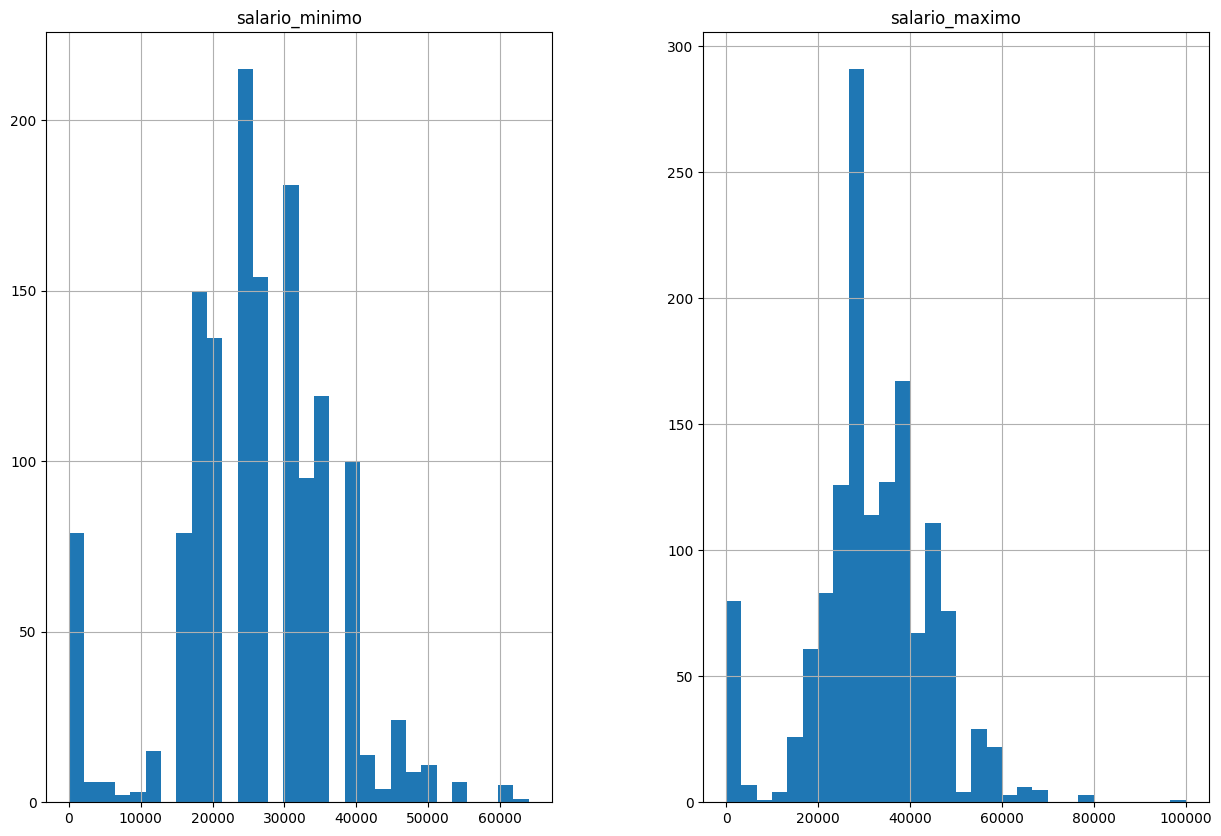

In [143]:
#visualizamos con histograma:
dfes.hist(bins=30, figsize=(15,10))
plt.show()

In [144]:
dfes['tipo de trabajo'] = dfes['tipo de trabajo'].replace({'trabajo solo presencial': 'presencial', 'solo teletrabajo': 'teletrabajo'})

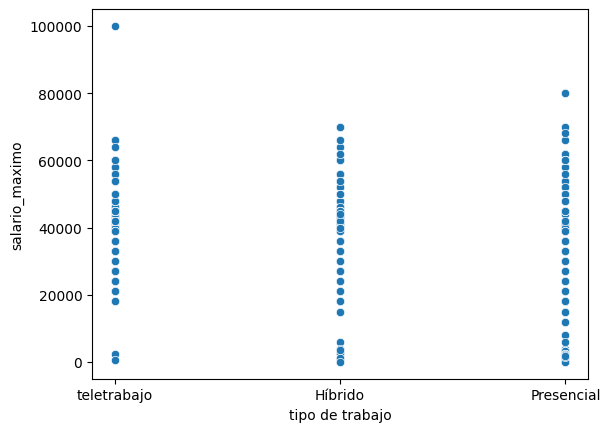

In [145]:
sns.scatterplot(data=dfes, x='tipo de trabajo', y='salario_maximo')
plt.show()

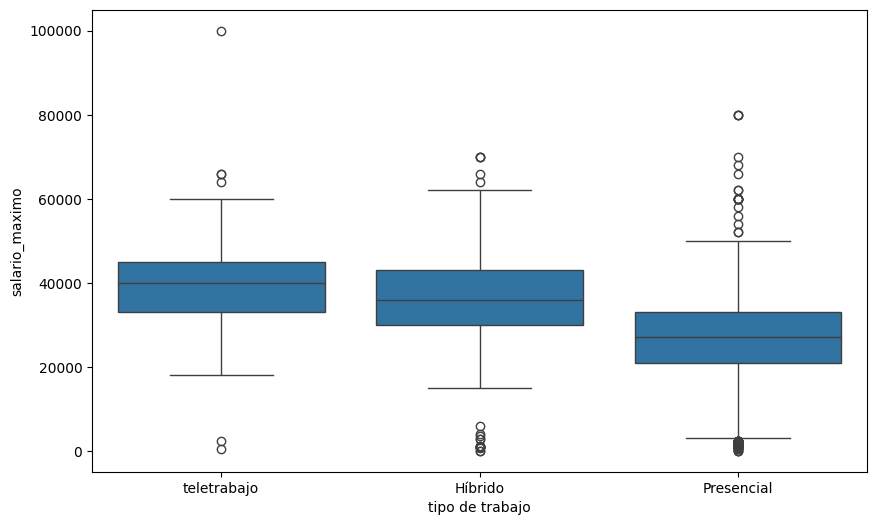

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tipo de trabajo', y='salario_maximo')
plt.show()

In [147]:
print(dfes['tipo de trabajo'].value_counts())


tipo de trabajo
Presencial     642
Híbrido        456
teletrabajo    316
Name: count, dtype: int64


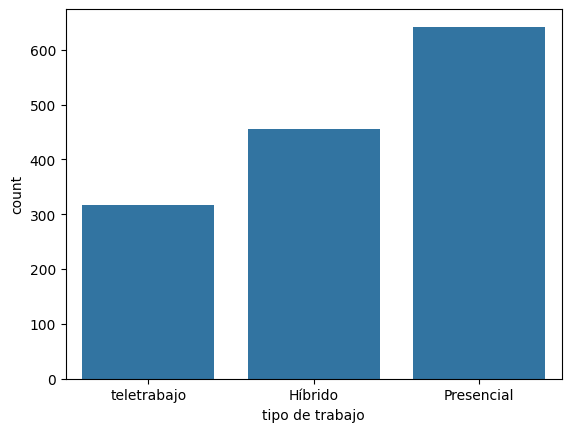

In [148]:
sns.countplot(data=dfes, x='tipo de trabajo')
plt.show()

In [149]:
print(dfes['tipo de trabajo'].value_counts())

tipo de trabajo
Presencial     642
Híbrido        456
teletrabajo    316
Name: count, dtype: int64


In [150]:
#comprobamos valores nulos
null_count = dfes.isnull().sum().sum()
print(null_count)

0


In [151]:
dfes['periodo salarial'].unique()

array(['YEAR', 'MONTH', 'HOUR'], dtype=object)

In [152]:
dfes['hour']=dfes['periodo salarial'].str.split('-').str[0]
conteo=dfes['hour'].value_counts()
conteo

hour
YEAR     1328
MONTH      81
HOUR        5
Name: count, dtype: int64

In [153]:
hourly_titles = dfes.loc[dfes['periodo salarial'] == 'HOUR', 'titulo']
hourly_titles

894                            PROGRAMADOR PHP CON INGLÉS
2420       Operario/a Alimentación Turnos Rotativos M/T/N
5286    Técnico Mantenimiento Industrial - mecánico (d...
5943                                 Ingeniero de acopios
6127                       Administrativo/a Telemarketing
Name: titulo, dtype: object

In [154]:
dfes['periodo salarial'].unique()

array(['YEAR', 'MONTH', 'HOUR'], dtype=object)

In [155]:
monthly_titles = dfes.loc[dfes['periodo salarial'] == 'MONTH', 'titulo']
monthly_titles

30                         MOZO/A ELECTRÓNICO INFORMÁTICO
31                              Técnico/a Helpdesk Málaga
52                           EUSKALTEL CARREFOUR OIARTZUN
117     Técnico/a instalaciones telecomunicaciones en ...
211     Técnico de instalaciones de telecomunicaciones...
                              ...                        
5841                           Beca IT Business Solutions
5877                  PRÁCTICAS CONSULTORÍA FUNCIONAL ERP
5975                            Comercial botiga Movistar
6084                        Maquetador/Diseñador/Creativo
6112           Instalador/a de Redes y Telecomunicaciones
Name: titulo, Length: 81, dtype: object

In [156]:
hourly_indices = dfes[dfes['periodo salarial'] == 'HOUR'].index
dfes.drop(hourly_indices, inplace=True)
dfes.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,es,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR,EUR,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR,EUR,YEAR


In [157]:
monthly_indices = dfes[dfes['periodo salarial'] == 'MONTH'].index
dfes.drop(monthly_indices, inplace=True)
dfes.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,es,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR,EUR,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,es,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR,EUR,YEAR


In [158]:
dfes['periodo salarial'].unique()

array(['YEAR'], dtype=object)

In [159]:
columnas_a_eliminar=['cod_pais','periodo salarial','moneda']
dfes=dfes.drop(columnas_a_eliminar,axis=1)
dfes.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,hour
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR
5,2022-07-12,TÉCNICO/A INFORMÁTICO/A,"Desde Hiring, estamos colaborando con una con...",Hiring,Maresme Central,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,18000.00,21000.00,YEAR
10,2022-07-12,PROGRAMADOR FRONT-END,En IRIUM nos preocupamos porque no dejes de pe...,IRIUM SOLUCIONES Y SISTEMAS,Málaga,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,30000.00,40000.00,YEAR


In [160]:
palabras_clave = ['data', 'analyst', 'analista']

# Crea una máscara booleana que indique si cada fila contiene alguna de las palabras clave
mask = dfes['titulo'].str.contains('|'.join(palabras_clave), case=False)

# Filtra el DataFrame utilizando la máscara
resultados = dfes[mask]

# Imprime los resultados
resultados.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,hour
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR
60,2022-07-12,Programador/Analista Programador AS400 y RPG,Nuestra empresa está seleccionando y contratan...,SERVICIOS UNIFICADOS CATORCE,Madrid,completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,27000.00,36000.00,YEAR
62,2022-07-12,Analista Programador Oracle - PL/SQL _ Teletra...,Nos gustaría Incorporar a un Analista Programa...,ORIZON Soluciones Tecnológicas,Madrid,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR
78,2022-07-12,Big Data Engineer - Technical Support - Google...,WHAT WE LOOK FOR\r\n\r\nWe are looking for a t...,Webhelp Spain,Barcelona,completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,27000.00,33000.00,YEAR
82,2022-07-12,Analista Funcional Salesforce (Teletrabajo 100%),"Desde PS LAB, tenemos la necesidad de incorpor...","PS LAB CONSULTING, S.L.",Madrid,completa,teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,43000.00,YEAR


In [161]:
palabras_clave = ['data', 'analyst', 'analista']

# Crea una máscara booleana que indique si cada fila contiene alguna de las palabras clave
mask = dfes['titulo'].str.contains('|'.join(palabras_clave), case=False)

# Filtra el DataFrame utilizando la máscara
resultados = dfes[mask]

# Imprime los resultados
ruta_archivo_csv='/content/drive/MyDrive/EDAdfs_(3).csv'
dfes=pd.read_csv(ruta_archivo_csv)
dfes.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
0,2022-07-12,Técnico Gestión de la Demanda,-Definición de roles y escenarios\r\n - D...,Atento España - Estructura,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
1,2022-07-12,Java - SpringBoot - Proyecto estable - Teletra...,"Desde AgioGlobal Technology, nos encontramos e...",AGIO GLOBAL TECHNOLOGY,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,40000.00,45000.00,YEAR,EUR,YEAR
2,2022-07-12,Consultor SAP Hana Ingles Alto (Remoto),AirON compañia de innovacion servicios tecnolo...,AIRON Sistemas S.L.,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,30000.00,YEAR,EUR,YEAR
3,2022-07-12,ANDROID DEVELOPER. INGLÉS ALTO. 100% REMOTO,Desde MODIS IT consultora GLOBAL especializada...,MODIS,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
4,2022-07-12,Analista Funcional TEMPORAL,Nuevas aplicaciones/Extensión de la funcionali...,Atento España - Estructura,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR


In [163]:
# Definir las palabras clave que deseas buscar en los títulos
palabras_clave = ['analisis', 'analysis', 'data', 'science', 'product', 'marketing','front','end','analyst','scientist']

# Crear una expresión regular para buscar las palabras clave en los títulos, ignorando mayúsculas y minúsculas
patron = '|'.join(palabras_clave)

# Aplicar la expresión regular a la columna 'title' y obtener los títulos que coinciden
titulos_coincidentes = dfes[dfes['titulo'].str.contains(patron,case=False)]['titulo']

# Obtener los valores únicos de los títulos que coinciden
valores_unicos = titulos_coincidentes.unique()

# Contar la frecuencia de cada título que coincide con las palabras clave
frecuencia_titulos = titulos_coincidentes.value_counts()

# Imprimir los valores únicos y la frecuencia de cada título que coincide con las palabras clave

df_resultado = pd.DataFrame({'Titulo': valores_unicos, 'Frecuencia': frecuencia_titulos})
df_resultado.head().reset_index()

,titulo,Titulo,Frecuencia
0,Product Owner,PROGRAMADOR FRONT-END,5
1,Consultor/a técnico y desarrollador de Product...,Big Data Engineer - Technical Support - Google...,4
2,Take UP - Business Analyst Junior con Francés,Ruby Backend Engineer,4
3,Agente de Telemarketing Sector Tecnológico,Desarrollador Front-end,4
4,Data Engineer,Frontend Developer Angular.,4


In [164]:
# Definir las palabras clave que deseas buscar en los títulos
palabras_clave = ['analisis', 'analysis', 'data', 'science', 'product', 'marketing','front','end','analyst','scientist','project manager']

# Crear una expresión regular para buscar las palabras clave en los títulos, ignorando mayúsculas y minúsculas
patron = '|'.join(palabras_clave)

# Aplicar la expresión regular a la columna 'title' y obtener los títulos que coinciden
titulos_coincidentes = dfes[dfes['titulo'].str.contains(patron)]['titulo']

# Obtener los valores únicos de los títulos que coinciden
valores_unicos = titulos_coincidentes.unique()

# Contar la frecuencia de cada título que coincide con las palabras clave
frecuencia_titulos = titulos_coincidentes.value_counts()

# Imprimir los valores únicos y la frecuencia de cada título que coincide con las palabras clave
print("Valores únicos:")
print(valores_unicos)

print("\nFrecuencia de títulos que coinciden con las palabras clave:")
print(frecuencia_titulos)

Valores únicos:
['Ruby Backend Engineer' 'Desarrollador Front-end'
 'Frontend Developer Angular.'
 'Dependiente/a Tienda Orange - Valencia - Jornada Completa'
 'Frontend Developer (Angular) - Full Remote'
 'Dependiente/a comercial tienda Orange - San Sebastián de los Reyes'
 'Frontend Developers (React)/ Desarrolladores Frontend (React)'
 'Senior Developer Backend PHP' 'Vendor Relationship Manager'
 'Progamador Backend PHP' 'Programador Backend (Java o PHP)'
 'Backend JAVA Developer - Full remote'
 'Publisher Operations Manager - EMEA (All Genders)'
 'Senior Front End Developer (2D Rendering-Canvas)'
 'Tech Lead - Ruby on Rails Backend Engineer (all genders are welcome) RoR - SPAIN'
 'Desarrollador/a front-end senior'
 'Programador Backend/Frontend  Java/Javascript en Madrid presencial'
 'Analista funcional IT (Mercados derivados y productos de inversión) (VE01)'
 'Ruby on Rails Backend Engineer' 'Desarrollador/a Backend'
 'Evaluador/a Independiente de Seguridad' 'Backend Prestashop'
 

##Filtrado DATASET ESPAÑA##

In [165]:
# Aplicar la expresión regular a la columna 'title' y filtrar el DataFrame original
df_nuevo = dfes[dfes['titulo'].str.contains(patron)]

# Imprimir el nuevo DataFrame
df_nuevo.head(10).reset_index()

,index,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
0,87,2022-07-12,Ruby Backend Engineer,¿Eres programador fullstack y trabajas con Rub...,ENTELGY - Zona Madrid,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
1,88,2022-07-12,Desarrollador Front-end,"Desde Fed IT, principal consultora de selecció...",FED IT,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,39000.00,YEAR,EUR,YEAR
2,89,2022-07-12,Frontend Developer Angular.,¿Eres Desarrollador Angular y te gustaría trab...,BOYCOR,Alcobendas,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,36000.00,YEAR,EUR,YEAR
3,132,2022-07-12,Dependiente/a Tienda Orange - Valencia - Jorna...,"Somos importante distribuidor de Orange, actua...",Oshop,Valencia,es,Jornada completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
4,154,2022-07-12,Frontend Developer (Angular) - Full Remote,Somos GeeksHubs y hacemos lo siguiente:\r\n\r\...,Geekshubs,Málaga,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR
5,239,2022-07-12,Dependiente/a comercial tienda Orange - San Se...,Somos un distribuidor oficial homologado de Or...,Oshop,San Sebastián de los Reyes,es,Jornada completa,Presencial,Informática y telecomunicaciones,Contrato de duración determinada,18000.00,21000.00,YEAR,EUR,YEAR
6,243,2022-07-12,Frontend Developers (React)/ Desarrolladores F...,We are looking for frontend developers with ad...,SD Tech Hub Spain SL,Barcelona,es,Jornada intensiva - mañana,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,36000.00,50000.00,YEAR,EUR,YEAR
7,269,2022-07-12,Senior Developer Backend PHP,"En Métrica Consulting, empresa de reconocido p...",METRICA CONSULTING,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,33000.00,42000.00,YEAR,EUR,YEAR
8,291,2022-07-12,Vendor Relationship Manager,En Adecco buscamos a un/a Vendor Relationship ...,ADECCO,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
9,303,2022-07-12,Progamador Backend PHP,"Somos ARATECH, una consultora tecnológica, nac...",Ara Technology,Sant Cugat del Vallès,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,36000.00,YEAR,EUR,YEAR


In [166]:
df_nuevo.shape

(167, 15)

In [167]:
value_counts = df_nuevo['nombre_empresa'].value_counts()

print(value_counts)

nombre_empresa
Geekshubs                             8
TD SYNNEX                             7
BETWEEN Technology                    5
Cocomore AG                           4
M2C an Ayesa Company                  3
                                     ..
Q-TECH                                1
Randstad                              1
R & C Associats                       1
Interactiu Comunicació Digital, SL    1
DATIVE PARTNERS SOCIEDAD LIMITADA.    1
Name: count, Length: 111, dtype: int64


In [63]:
#cantidad de ofertas por titulo:
cantidad_ofertas=df_nuevo['titulo'].value_counts()
print(cantidad_ofertas)

titulo
Frontend Developer                                                                     4
Agente de Telemarketing Sector Tecnológico                                             4
(Senior) Backend Engineer                                                              3
Backend JAVA Developer - Full remote                                                   2
Junior Frontend Developer                                                              2
                                                                                      ..
Desarrollador/a Backend Java TELETRABAJO 100% o híbrido a elegir                       1
Senior Python Backend Developer (Barcelona - Hybrid)                                   1
Experienced Backend Developer (m/f/d)                                                  1
Gestor/a de proyectos de diseño  e industrialización de productos. Inglés. Móstoles    1
Senior Java Developer - Backend                                                        1
Name: count, L

In [64]:
cantidad_total_de_ofertas=df_nuevo.shape[0]
print("el numero total de ofertas es:",cantidad_total_de_ofertas)

el numero total de ofertas es: 167


In [65]:
#salario minimo:
salario_minimo=df_nuevo['salario_minimo'].mean()
print(round(salario_minimo))

27733


In [66]:
#salario maximo:
salario_maximo=df_nuevo['salario_maximo'].mean()
print(round(salario_maximo))

36181


In [67]:
#salario medio
salario_medio=(salario_minimo+salario_maximo)/2
print("el salario medio es:",round(salario_medio),"euros")

el salario medio es: 31957 euros


In [68]:
5#empresas que publican los mejores salarios, por encima de la media
empresas=df_nuevo.groupby('nombre_empresa')
filtrado=empresas.filter(lambda x: x['salario_maximo'].sum()>33071)
principales_empresas=df['nombre_empresa'].head()
print(principales_empresas)

0    Atento España - Estructura
1        AGIO GLOBAL TECHNOLOGY
2           AIRON Sistemas S.L.
3                         MODIS
4    Atento España - Estructura
Name: nombre_empresa, dtype: object


In [69]:
#trabajo mejor pagado:
indice_max_salario=df_nuevo['salario_maximo'].idxmax()
trabajo_mejor_pagado=df.loc[indice_max_salario]
print(trabajo_mejor_pagado)

fecha de publicacion                                  2022-07-04 00:00:00
titulo                      Frontend Developer Angular - Teletrabajo 100%
descripcion             Desde AgioGlobal Technology, nos encontramos e...
nombre_empresa                                     AGIO GLOBAL TECHNOLOGY
ciudad                                                             Madrid
cod_pais                                                               es
jornada                                                  Jornada completa
tipo de trabajo                                          Solo teletrabajo
cluster                                  Informática y telecomunicaciones
tipo de contrato                                      Contrato indefinido
salario_minimo                                                   50000.00
salario_maximo                                                   60000.00
periodo salarial                                                     YEAR
moneda                                

In [70]:
df_nuevo.head()

,fecha de publicacion,titulo,descripcion,nombre_empresa,ciudad,cod_pais,jornada,tipo de trabajo,cluster,tipo de contrato,salario_minimo,salario_maximo,periodo salarial,moneda,hour
87,2022-07-12,Ruby Backend Engineer,¿Eres programador fullstack y trabajas con Rub...,ENTELGY - Zona Madrid,Madrid,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
88,2022-07-12,Desarrollador Front-end,"Desde Fed IT, principal consultora de selecció...",FED IT,Madrid,es,Jornada completa,Híbrido,Informática y telecomunicaciones,Contrato indefinido,24000.00,39000.00,YEAR,EUR,YEAR
89,2022-07-12,Frontend Developer Angular.,¿Eres Desarrollador Angular y te gustaría trab...,BOYCOR,Alcobendas,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,27000.00,36000.00,YEAR,EUR,YEAR
132,2022-07-12,Dependiente/a Tienda Orange - Valencia - Jorna...,"Somos importante distribuidor de Orange, actua...",Oshop,Valencia,es,Jornada completa,Presencial,Informática y telecomunicaciones,Contrato indefinido,NaN,NaN,NaN,NaN,NaN
154,2022-07-12,Frontend Developer (Angular) - Full Remote,Somos GeeksHubs y hacemos lo siguiente:\r\n\r\...,Geekshubs,Málaga,es,Jornada completa,Solo teletrabajo,Informática y telecomunicaciones,Contrato indefinido,24000.00,27000.00,YEAR,EUR,YEAR


In [175]:
dfes.to_csv('EDAdfs.csv',index=False)

#